# Академия Аналитиков Авито

# Эконометрика

# Экзамен

## Задача 1 (40 баллов)

- Итак, у вас есть небольшой датасет `insurance.csv` с затратами на мед. страхование

In [ ]:
# Давайте загрузим данные
!mkdir data
!wget https://raw.githubusercontent.com/yk4r2/AAA/main/Econometrics/exam/data/insurance.csv -O data/insurance.csv

--2021-04-27 15:09:05--  https://raw.githubusercontent.com/yk4r2/AAA/main/Econometrics/exam/data/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘data/insurance.csv’

data/insurance.csv  100%[===================>]  54.32K  --.-KB/s    in 0.002s  

2021-04-27 15:09:06 (34.1 MB/s) - ‘data/insurance.csv’ saved [55628/55628]



In [ ]:
import pandas as pd

In [ ]:
# Посмотрим на них
ins = pd.read_csv('data/insurance.csv')
ins.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

- age: возраст

- sex: пол

- bmi: индекс массы тела

- children: кол-во детей, которое покрывает страховка

- smoker: курильщик или нет

- region: регион

- charges: затраты на страховку

In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
ins.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

In [ ]:
# У нас есть явно дискретные, в том числе и бинарные, признаки. Давайте сделаем что-нибудь с этим
for col in ins.columns:
    if ins[col].dtype == 'object':
        print(f'col: {ins[col].unique()}')

col: ['female' 'male']
col: ['yes' 'no']
col: ['southwest' 'southeast' 'northwest' 'northeast']


Заэнкодим их, чё б нет

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in ins.columns:
    if ins[col].dtype == 'object':
        ins[col] = LabelEncoder().fit_transform(ins[col].astype(str))

ins.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

- Переменные преобразованы, теперь можно и порисовать что-нибудь

In [ ]:
# Начнем с корреляций
ins.corr()

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000

In [ ]:
import seaborn as sns
%matplotlib inline

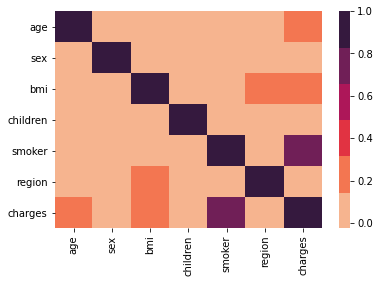

In [ ]:
sns.heatmap(ins.corr(),
            xticklabels=ins.corr().columns,
            yticklabels=ins.corr().columns,
            cmap=sns.color_palette('rocket_r'),
            )

**Выводы:**
- Курильщики больше тратят на страховку
- Возраст немного скоррелирован с желанием купить страховку
- bmi немного скоррелирован с регионом и с желанием купить страховку

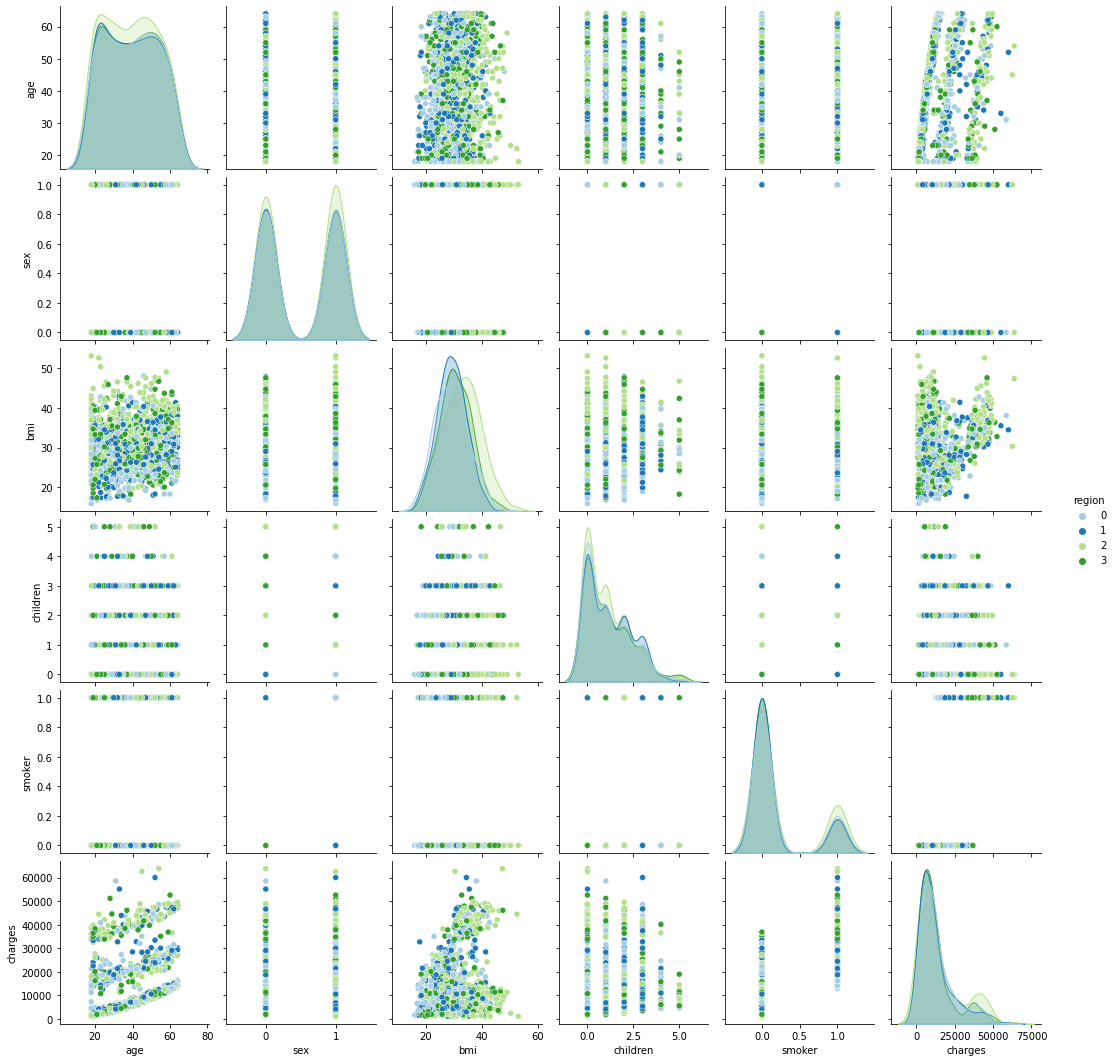

In [ ]:
# Так-так, а что с гистограммами и парными графиками 
sns.pairplot(ins, hue='region', palette=sns.color_palette("Paired", 4))

**Выводы:**
- В регионе 2 больше людей постарше по сравнению с остальными регионами
- Видимо из-за того, что женщины живут дольше, там их больше
- bmi в регионе 2 выше в среднем (это вроде как плохо, но это не точно)
- В регионе 2 меньше детей (пик на нуле и единице), в регионе 1 больше детей (пики на 3 и 4)
- В регионе 2 больше курящих, эх
- В регионе 2 любят покупать страховку

Чёт всё про регион 2.

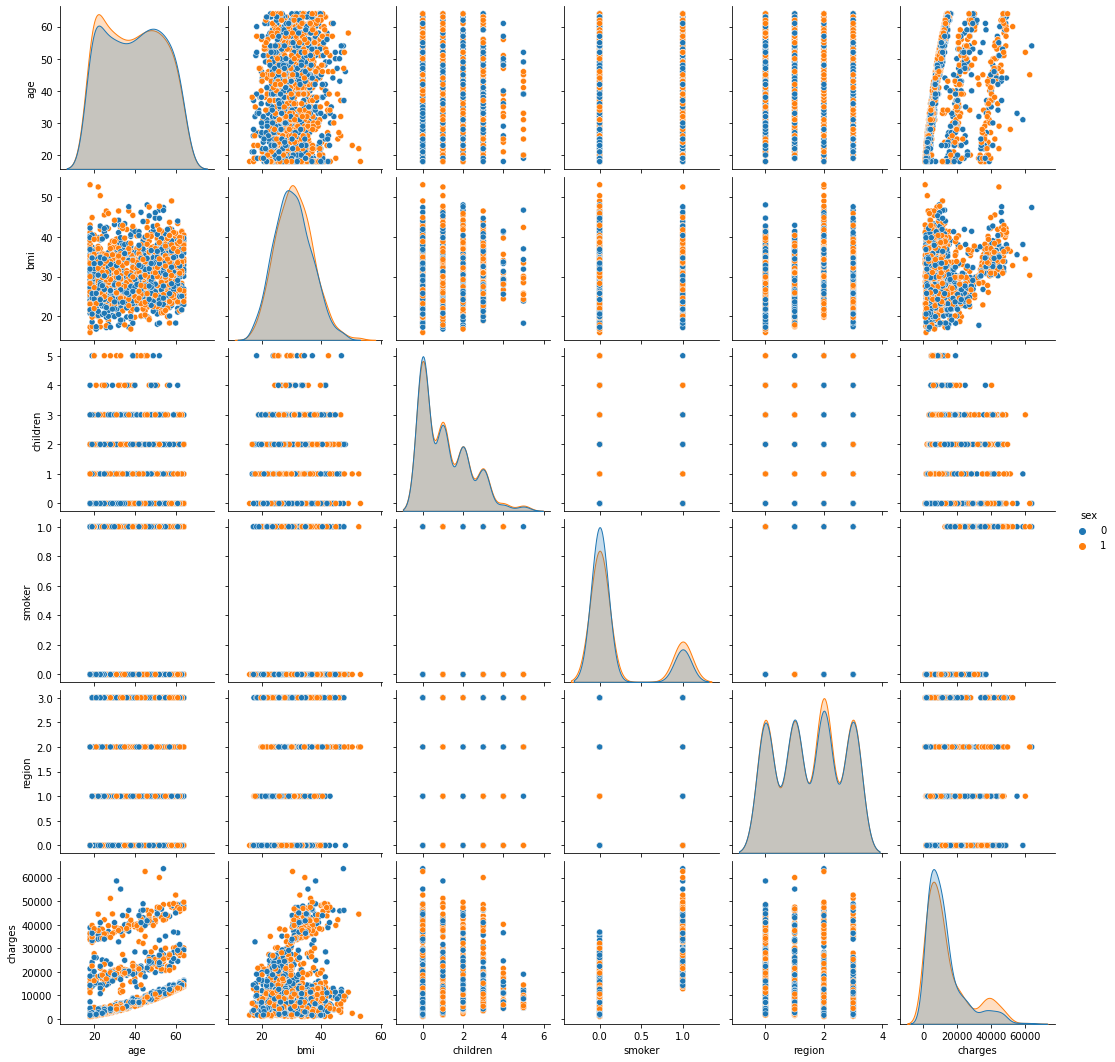

In [ ]:
sns.pairplot(ins, hue='sex')

**Выводы:**
- Люди с полом 0 больше курят и меньше тратят на страховку. Звучит как поведение мужчин))0))0

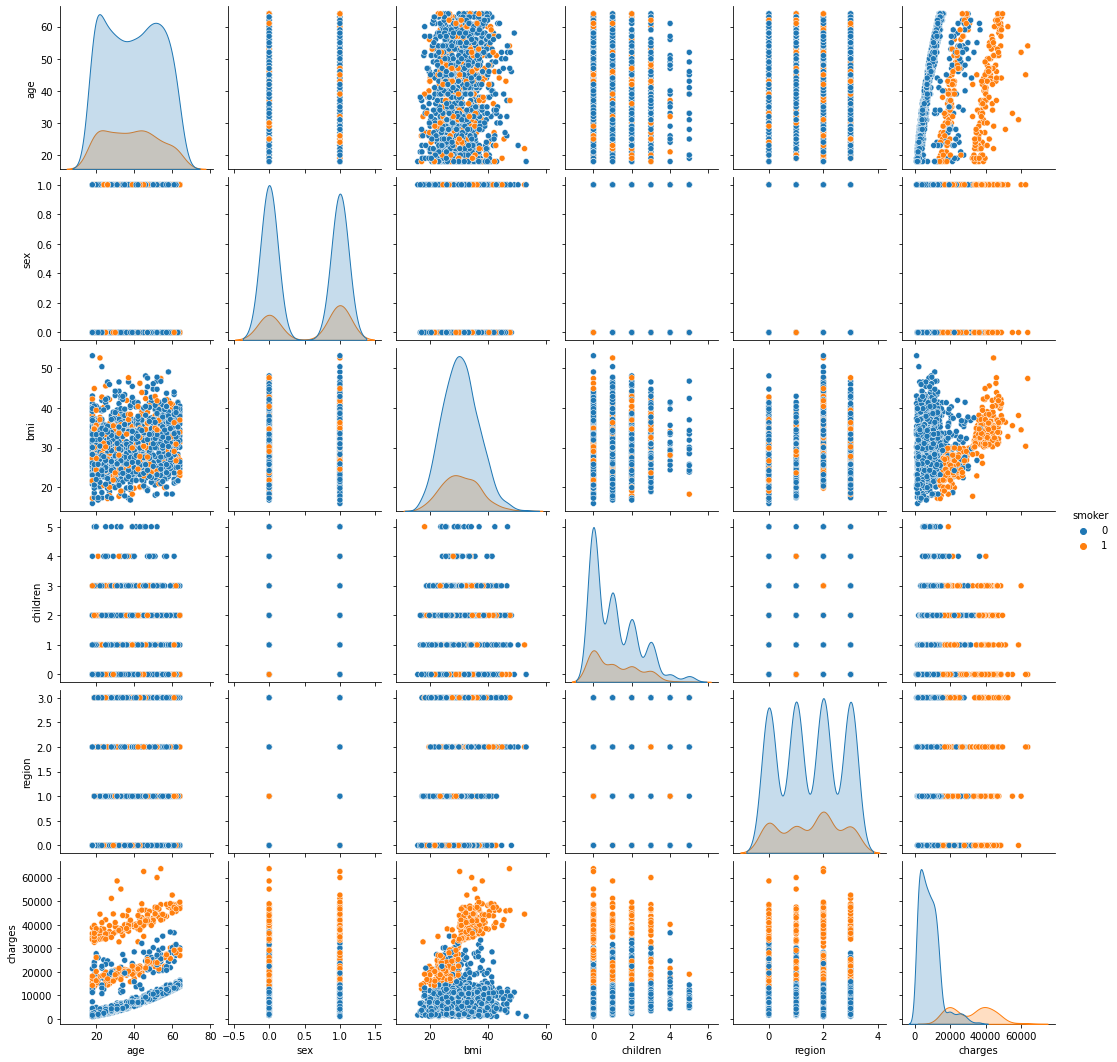

In [ ]:
sns.pairplot(ins, hue='smoker')

**Выводы:**
- Класс не сбалансирован, мне не нравится, но в целом:
    - куряги больше тратят на страховку
    - У курильщиков больше bmi
    - Курильщики любят регион 2

Посмотрим на баланс по классам


In [ ]:
ins.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

Ну собсна да, класс не сбалансирован.

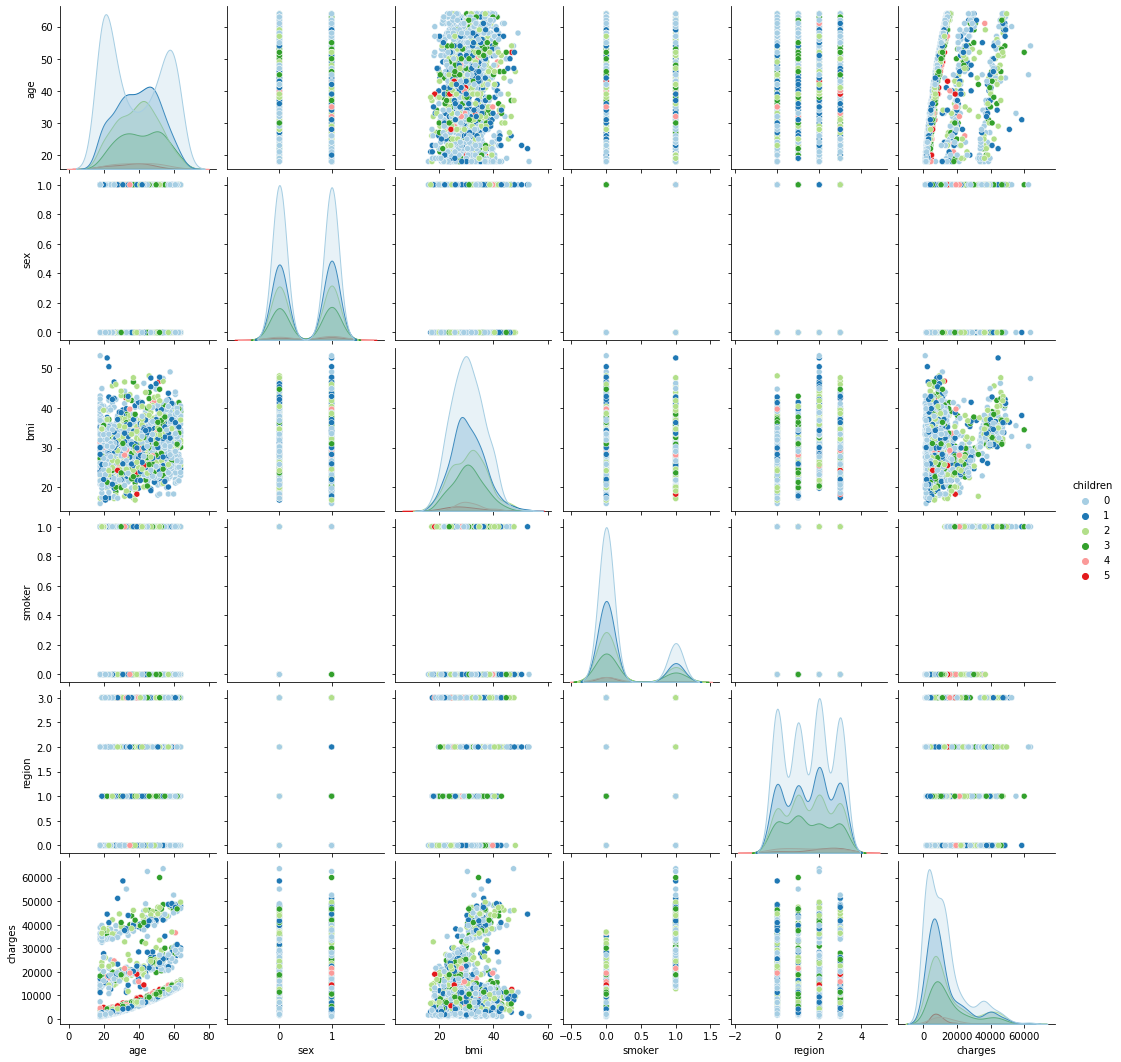

In [ ]:
sns.pairplot(ins, hue='children', palette=sns.color_palette("Paired", 6))

Понятно, что ничего непонятно. Давайте сделаем boxplot.

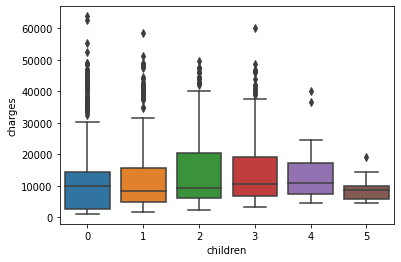

In [ ]:
sns.boxplot(x='children', y='charges', data=ins)

У, прикольно. Если у тебя нет детей, то ты тратишь на страховку много деняк, если от 1 до 4, то увеличиваешь, а если 5, то сил нет уже на себя тратиться, поэтому отдаёшь всё в детей. Извините.

Общий графичек, чтобы был:

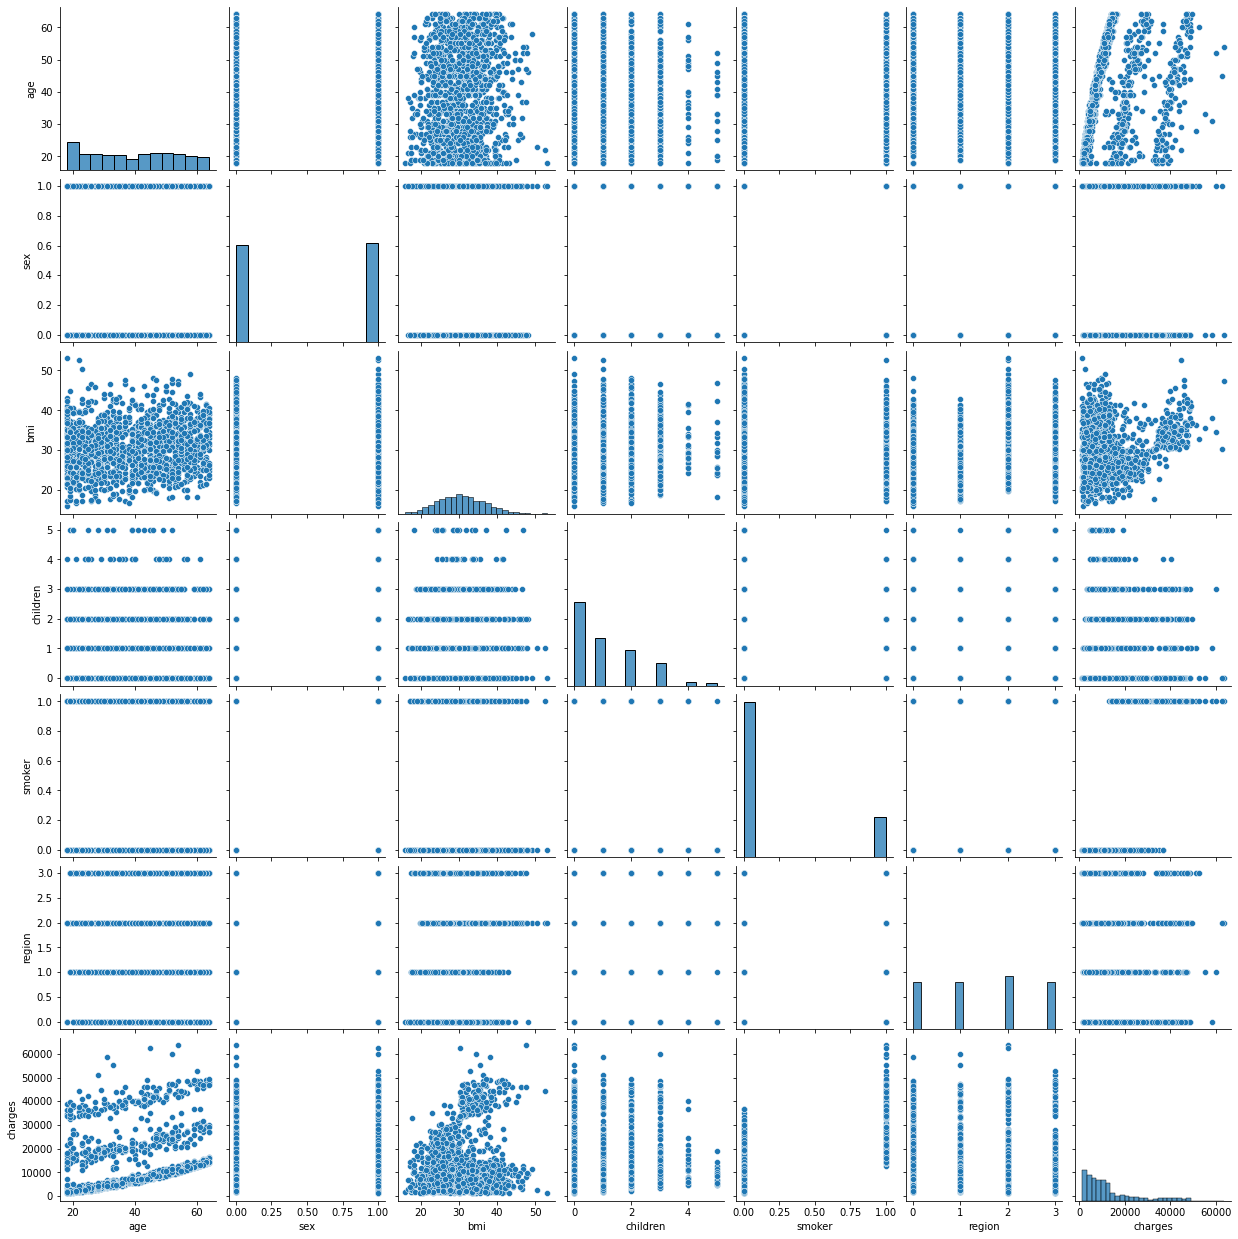

In [ ]:
sns.pairplot(ins)

**Выводы:**
- Сразу видно outlier'ы в charges и имбалансность smokerов и детей, устраним хотя бы выбросы в charges, замутив туда логарифм

In [ ]:
import numpy as np

In [ ]:
ins.charges = ins.charges.apply(np.log)

In [ ]:
ins.sample(5)

age  sex     bmi  children  smoker  region   charges
1105   54    0  31.240         0       0       2  9.243672
596    42    0  29.480         2       0       2  8.941193
766    47    1  32.300         1       0       3  8.995012
601    51    1  31.635         0       0       1  9.124143
608    28    1  26.980         2       0       0  8.397304

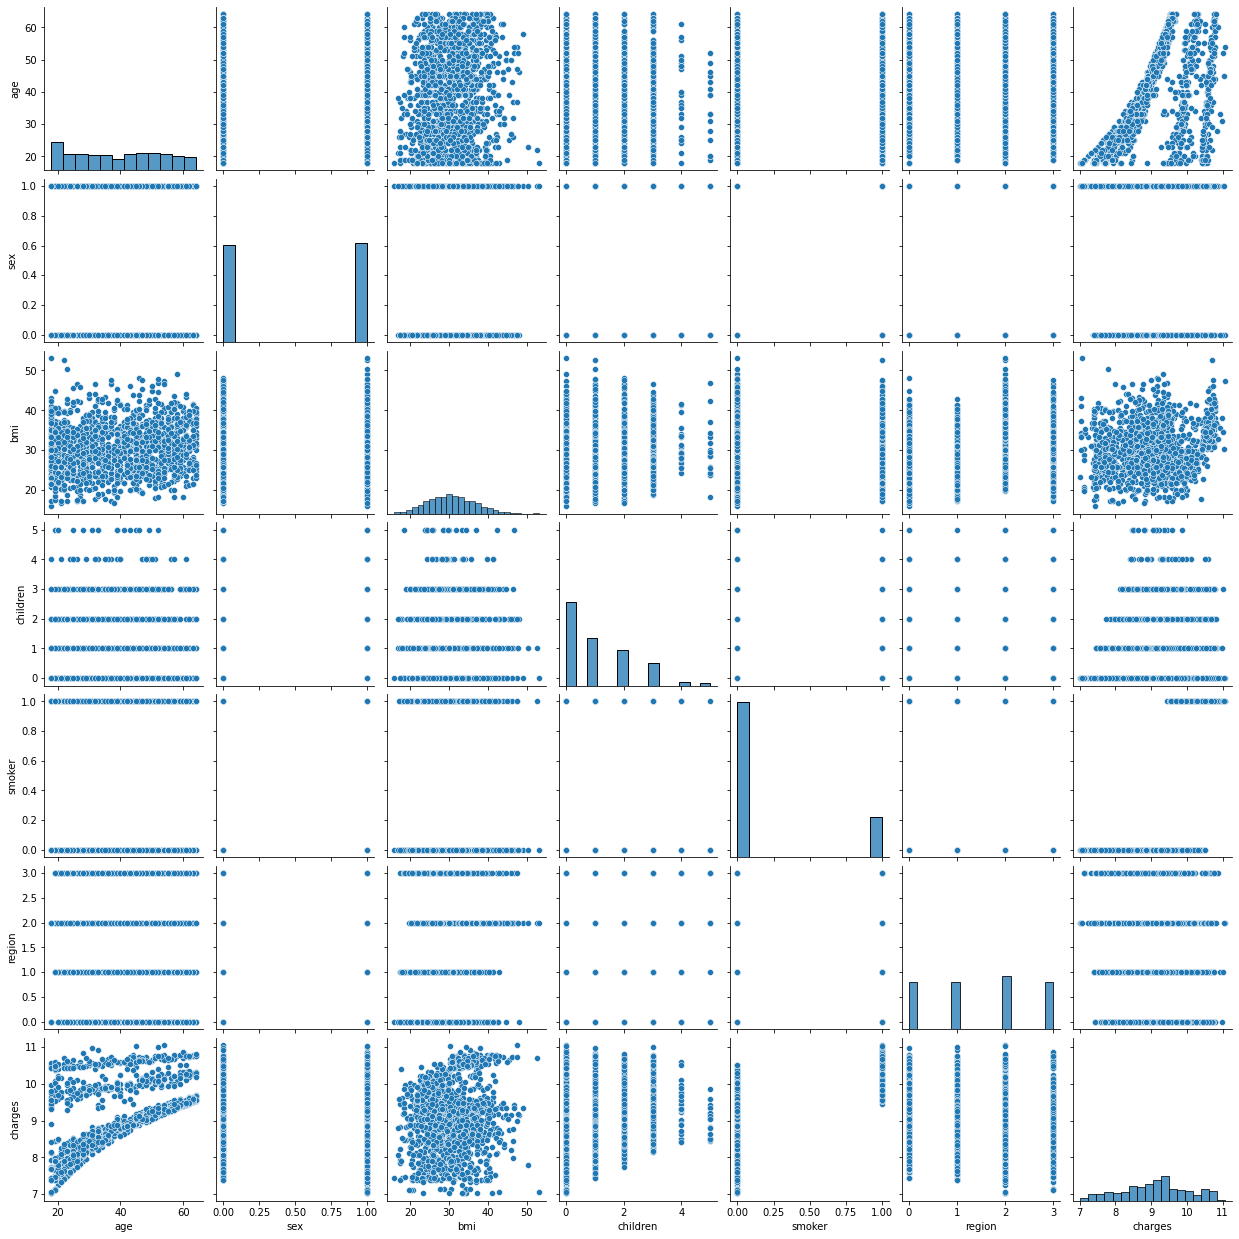

In [ ]:
sns.pairplot(ins)

In [ ]:
# Тут можно получить доп. баллы за более глубокий EDA анализ. Подумайте, какие перменные можно рассмотреть более детально

# ну я посмотрел на кат. фичи, это считается?))

- Так, пришла пора для регрессии

In [ ]:
# Постройте первую версию модели с теми признаками, которые вы считаете должны быть включены в модель

# Ну давайте сначала сделаем регрессию на smoker, bmi и age, по-моему это самое очевидное, что можно сделать
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols("charges ~ smoker + bmi + age", data=ins).fit()

In [ ]:
# Выведите результаты модели
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1296.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:58:35   Log-Likelihood:                -872.68
No. Observations:                1338   AIC:                             1753.
Df Residuals:                    1334   BIC:                             1774.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0738      0.072     98.801      0.000       6.933       7.214
smoker         1.5459      0.032     49.031      0.000       1.484       1.608
bmi            0.0108      0.002      5.132      0.000       0.007       0.015
age            0.0351      0.001     38.565      0.000       0.033       0.037
==============================================================================
Omnibus:                      361.543   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1106.029
Skew:                           1.346   Prob(JB):                    6.74e-241
Kurtosis:                       6.549   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from matplotlib import pyplot as plt

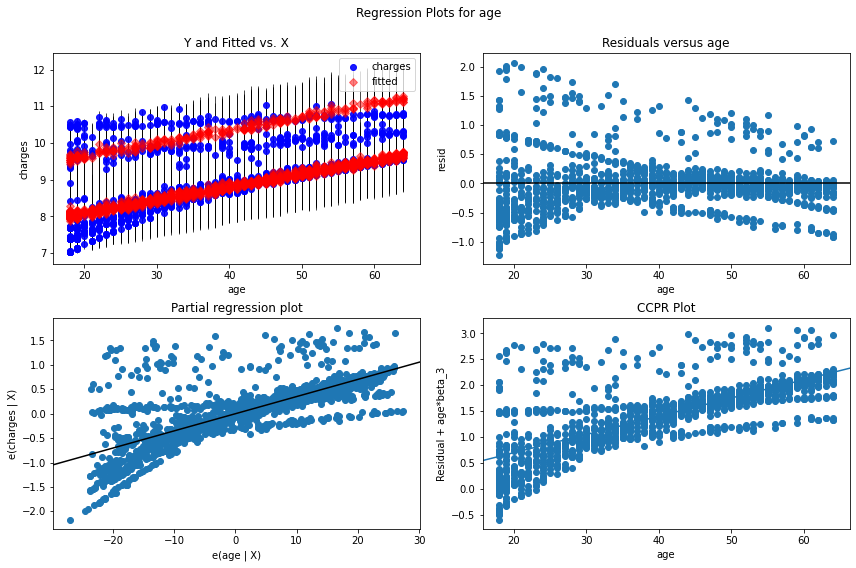

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)

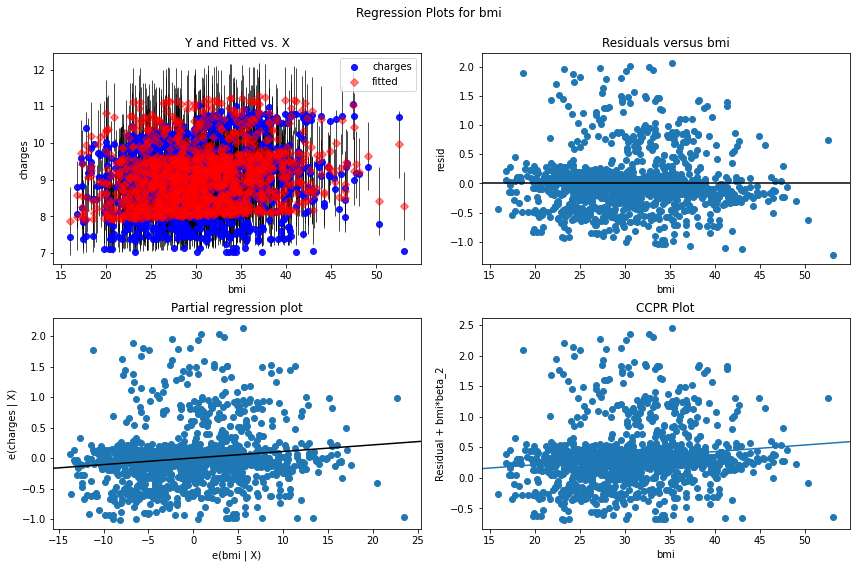

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "bmi", fig=fig)

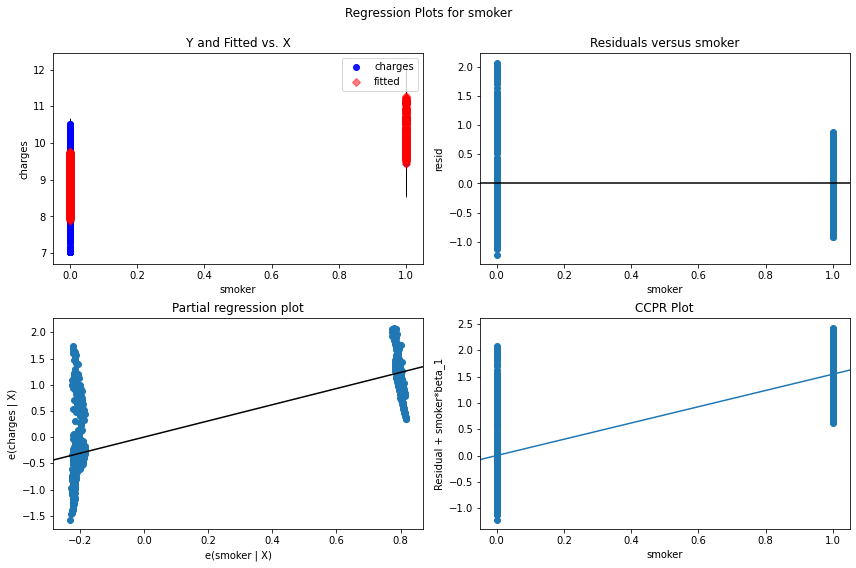

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "smoker", fig=fig)

**Выводы:**

- Мы не зря замутили сюда логарифм, он помог нам избавиться от хвоста (см. bmi)

- Пришла пора проверять предпосылки теоремы Г.М.

- Давайте проверим мультиколлинеарность

По идее мы не используем особенно скоррелированные величины кроме бинарных, всё должно быть ок. Но проверим, чем чёрт не шутит.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
[variance_inflation_factor(ins[['age', 'bmi', 'smoker']].values, i) for i in range(3)]

[7.458654929465073, 7.667211574343944, 1.2465008321984548]

**Выводы:**
- Мультиколлинеарности как будто бы нет

- Давайте проверим гетероскедастичность

In [ ]:
from statsmodels.stats.diagnostic import het_white

In [ ]:
het_white(model.resid, sm.add_constant(ins['charges']))

(123.21363119025449,
 1.7559006492069917e-27,
 67.70334351057878,
 9.868115609998341e-29)

**Выводы:**
- Ну и мультиколлинеарности тоже нет

- Как интересно _**<-------- действительно, интересно, ужас какой**_
- А если мы посмотрим на другие факторы, которые стоит учитывать при построении линейной регрессии

In [ ]:
# Сделайте еще один тест/проверку и объясните, почему вы выбрали именно этот тест/проверку
# Либо попытайтесь улучшить вашу модель, но объясните, какую метрику вы будете использовать

# Ну давайте выкинем наф*иг смокеров и посмотрим на результаты без них, чё

model_no_smoking = smf.ols("charges ~ bmi + age", data=ins).fit()
model_no_smoking.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     265.2
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.08e-97
Time:                        16:11:55   Log-Likelihood:                -1562.0
No. Observations:                1338   AIC:                             3130.
Df Residuals:                    1335   BIC:                             3146.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4146      0.119     62.183      0.000       7.181       7.649
bmi            0.0114      0.004      3.258      0.001       0.005       0.018
age            0.0340      0.002     22.304      0.000       0.031       0.037
==============================================================================
Omnibus:                      160.123   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.778
Skew:                           0.997   Prob(JB):                     6.94e-49
Kurtosis:                       3.044   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.mse_resid

0.21644278096315878

In [ ]:
model_no_smoking.mse_resid

0.6060520286831539

**Выводы:**
- Моделька со смокерами лучше по MSE, вау, какая неожиданность))0)00

- Наконец, давайте посмотрим на финальную версию вашей модели, если вы все же решили ее поменять после всех тестов

In [ ]:
# У меня нет времени, поэтому нет.

**Финальные выводы:**

## Задача 2 (30 баллов)

- Перейдем к супер измученному датасету с выжившими пассажирами Титаника `Titanic`

In [ ]:
# Давайте загрузим данные
!wget https://raw.githubusercontent.com/yk4r2/AAA/main/Econometrics/exam/data/Titanic.csv -O data/titanic.csv

--2021-04-27 16:15:59--  https://raw.githubusercontent.com/yk4r2/AAA/main/Econometrics/exam/data/Titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘data/titanic.csv’

data/titanic.csv    100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2021-04-27 16:15:59 (42.8 MB/s) - ‘data/titanic.csv’ saved [61194/61194]



In [ ]:
# Посмотрим на них
titanic = pd.read_csv('data/titanic.csv')
titanic.sample(5)

PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
659          660         0       1  ...  113.2750   D48         C
406          407         0       3  ...    7.7500   NaN         S
421          422         0       3  ...    7.7333   NaN         Q
723          724         0       2  ...   13.0000   NaN         S
800          801         0       2  ...   13.0000   NaN         S

[5 rows x 12 columns]

| | | |
|---|---|---|
|Переменная|Определение|Значения|
|survival|Выжил ли пассажир|0 = Нет, 1 = Да|
|pclass|Класс билета|1 = 1-й, 2 = 2-й, 3 = 3-й|
|sex|Пол||	
|Age|Возраст|лет|
|sibsp|# кол-во братьев\сестер или супругов на борту||
|parch|# кол-во родителей\детей на борту||
|ticket|Номер билета||
|fare|Стоимость билета||
|cabin|Номер кабины||
|embarked|Порт посадки|C = Cherbourg, Q = Queenstown, S = Southampton|

In [ ]:
titanic.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# От предобработки данных не уйти. 
# Во-первых, есть NaN значения. Что делаем?
# Наны тут в age, cabin и embarked, заполним их средним сгруппированным
# Во-вторых, есть категориальные признаки. Что делаем?

def impute_median(series):
    return series.fillna(series.median())

by_sex_class = titanic.groupby(['Sex', 'Pclass'])

titanic['Age'] = by_sex_class['Age'].transform(impute_median)

In [ ]:
titanic['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic.Embarked.value_counts().index[0])

Очевидно, что имя тут лишнее.

In [ ]:
titanic.drop('Name', axis=1, inplace=True)

In [ ]:
titanic.head()

PassengerId  Survived  Pclass  ...     Fare    Cabin  Embarked
0            1         0       3  ...   7.2500  Unknown         S
1            2         1       1  ...  71.2833      C85         C
2            3         1       3  ...   7.9250  Unknown         S
3            4         1       1  ...  53.1000     C123         S
4            5         0       3  ...   8.0500  Unknown         S

[5 rows x 11 columns]

Давайте пока сделаем LabelEncoder, а потом возможно и dummies для логрега

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
for col in titanic.columns:
    if titanic[col].dtype == 'object':
        titanic[col] = LabelEncoder().fit_transform(titanic[col].astype(str))

titanic.head()

PassengerId  Survived  Pclass  Sex  ...  Ticket     Fare  Cabin  Embarked
0            1         0       3    1  ...     523   7.2500    147         2
1            2         1       1    0  ...     596  71.2833     81         0
2            3         1       3    0  ...     669   7.9250    147         2
3            4         1       1    0  ...      49  53.1000     55         2
4            5         0       3    1  ...     472   8.0500    147         2

[5 rows x 11 columns]

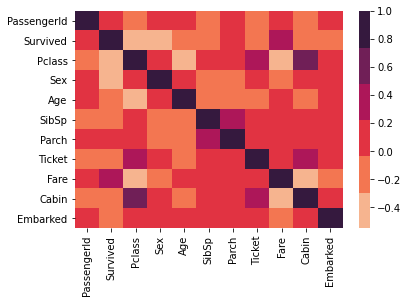

In [ ]:
# Начнем с корреляций
sns.heatmap(titanic.corr(),
            xticklabels=titanic.corr().columns,
            yticklabels=titanic.corr().columns,
            cmap=sns.color_palette('rocket_r'),
            )

**Выводы:**
- В целом и так ясно, что класс и кабина скоррелированы, по идее кабина содержит инфу о классе, но там было много пропусков, стрёмно выбрасывать
- Ещё есть корреляция между parch и sibsp, видимо, семейные трипы
- Заметна корреляция между кабиной и билетом вместе с корреляцией между классом и билетом, что тоже логично
- Есть корреляция между стоимостью билета и тем, выжил ли человек, прикольно

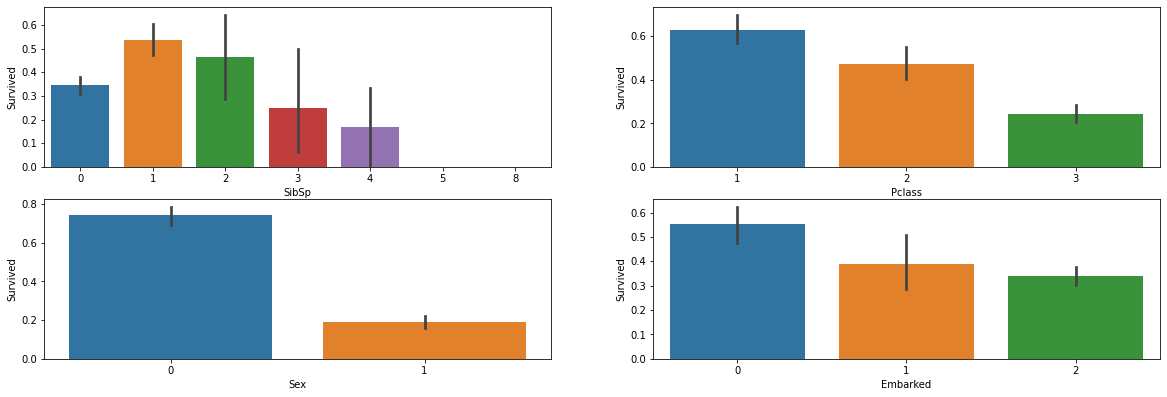

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'SibSp', y = 'Survived', data = titanic)
plt.subplot(322)
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic)
plt.subplot(323)
sns.barplot(x = 'Sex', y = 'Survived', data = titanic)
plt.subplot(324)
sns.barplot(x = 'Embarked', y = 'Survived', data = titanic)

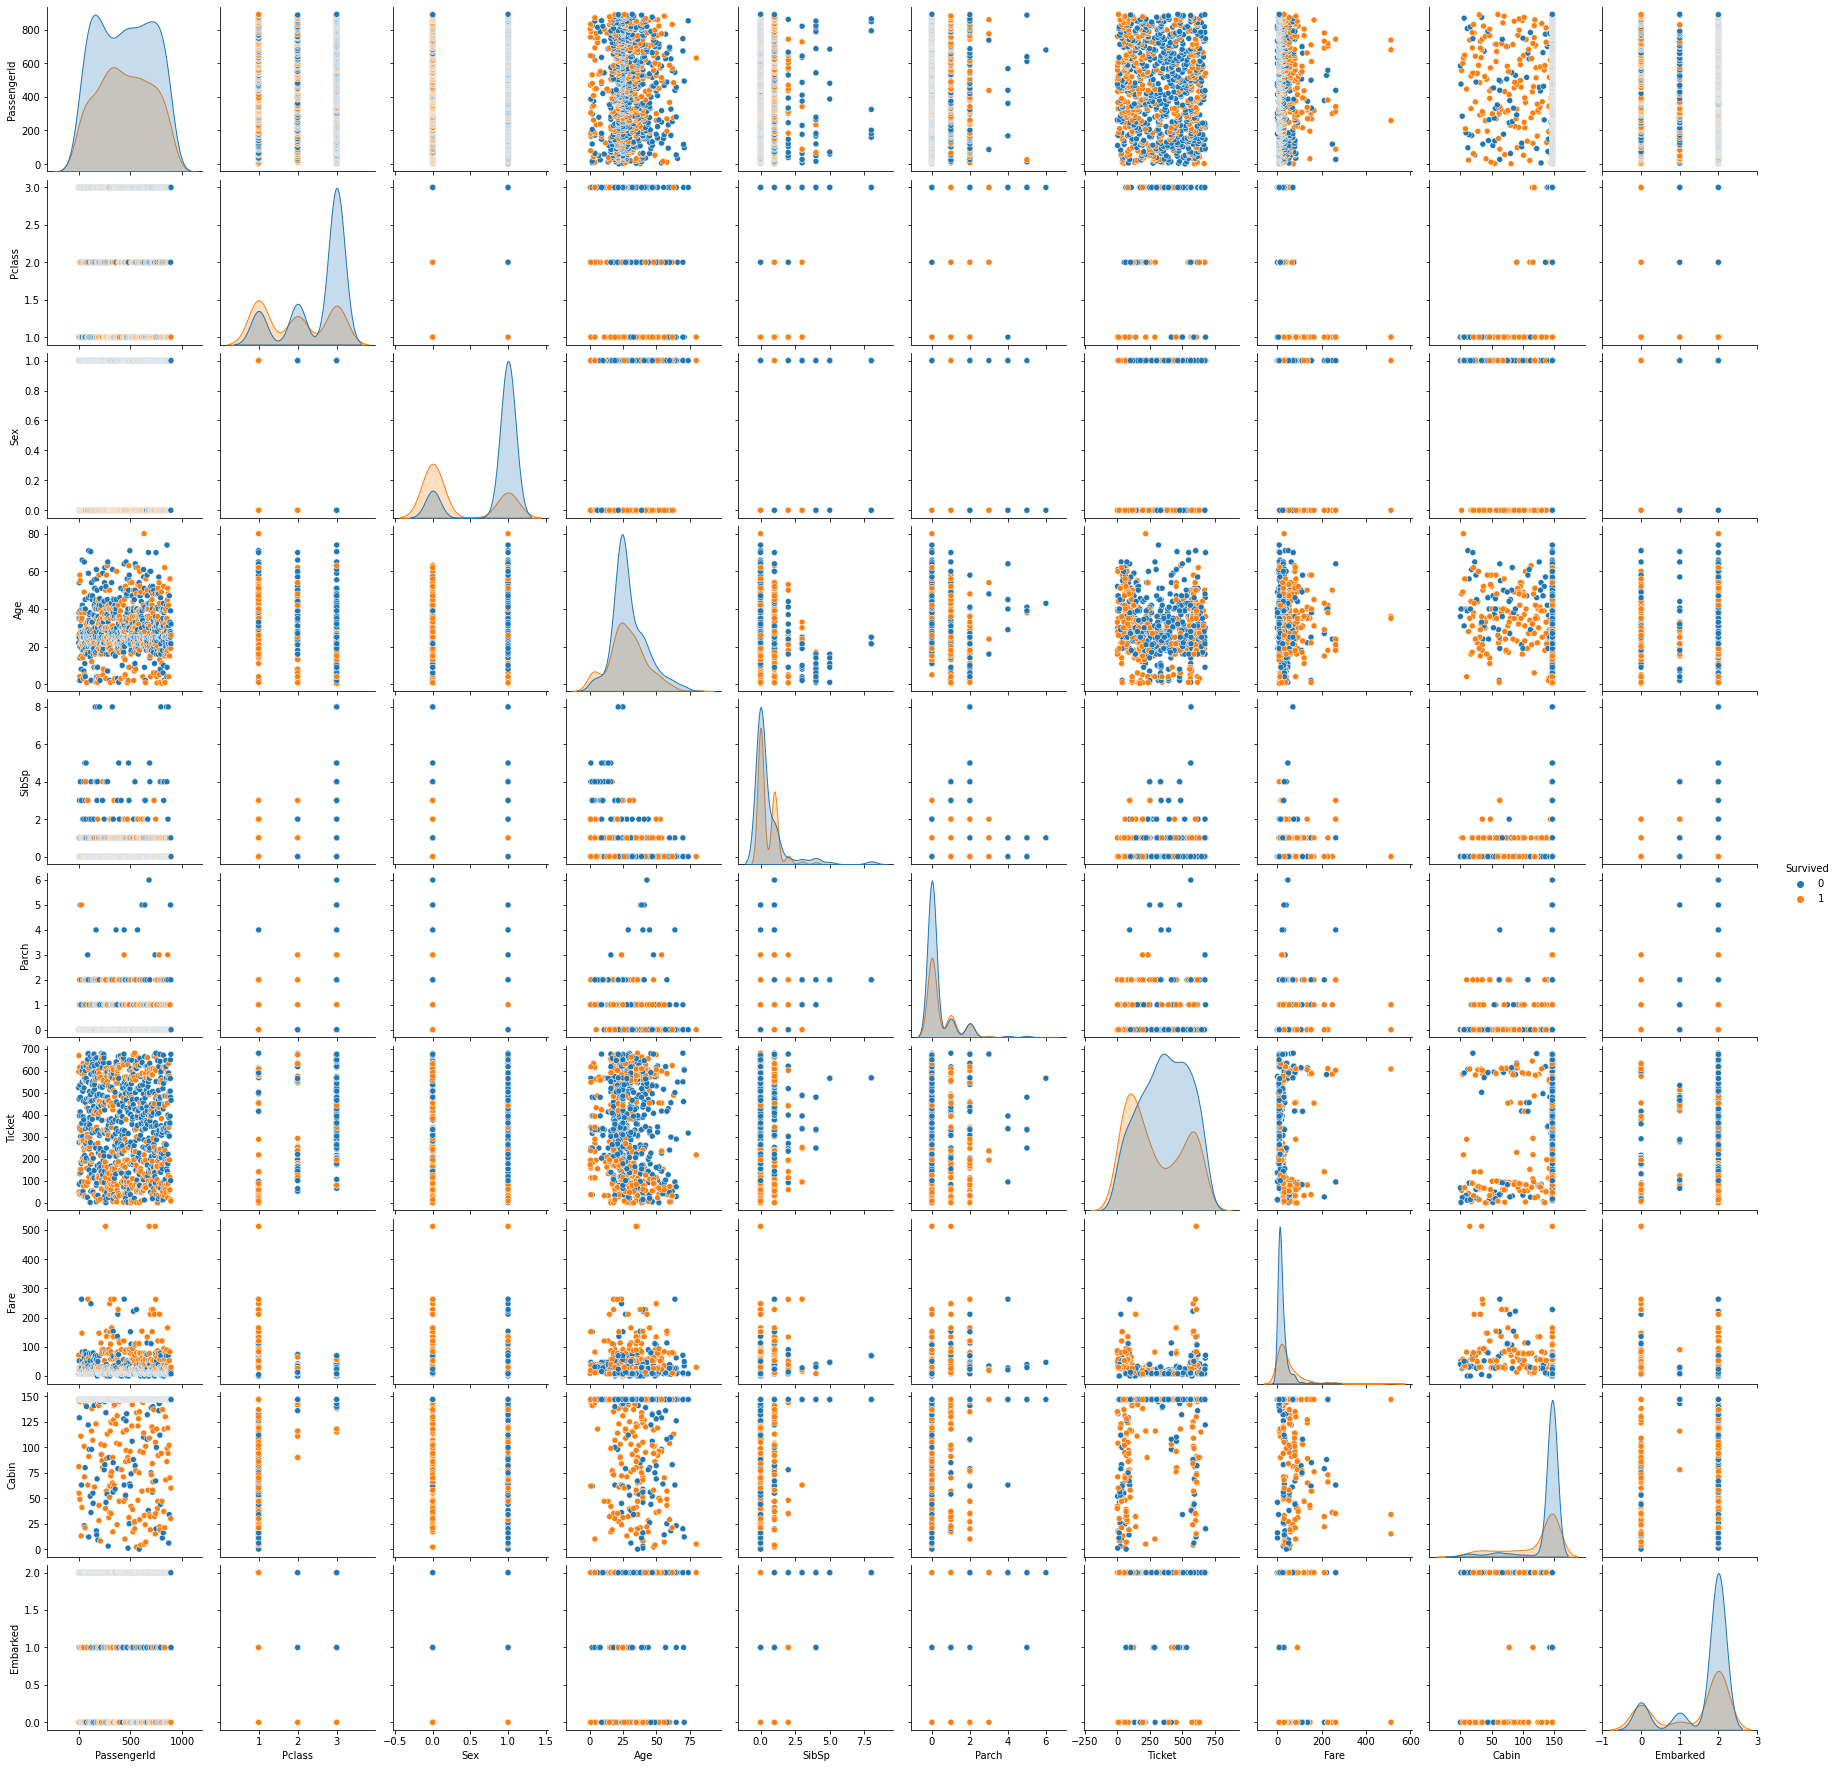

In [ ]:
# Так-так, а что с гистограммами и парными графиками 
sns.pairplot(titanic, hue='Survived')

**Выводы:**
- В целом больше людей погибло, чем спаслось :(
- Людей из 1 класса в процентном соотношении спаслось сильно больше, чем из 2 и 3 класса
- Женщин в процентном соотношении спаслось сильно больше, чем мужчин
- Спасали как будто бы стариков и детей (а зачем стариков?..)
- Люди с родственниками на борту спасались чаще (кумовство, да?)
- А ещё мужчин на борту сильно меньше, чем женщин

- Перейдем к регрессиям

In [ ]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
titanic['Fare'] = pd.cut(titanic["Fare"], bins = bins, labels = labels)

dummies = ['Fare', 'Embarked']
dummy_data = pd.get_dummies(titanic[dummies])
titanic['Sex'] = LabelEncoder().fit_transform(titanic['Sex'])

In [ ]:
titanic = pd.concat([titanic, dummy_data], axis=1)
titanic.drop(dummies, axis=1, inplace=True)

In [ ]:
titanic.sample(5)

PassengerId  Survived  Pclass  ...  Embarked_C  Embarked_Q  Embarked_S
461          462         0       3  ...           0           0           1
733          734         0       2  ...           0           0           1
776          777         0       3  ...           0           1           0
488          489         0       3  ...           0           0           1
281          282         0       3  ...           0           0           1

[5 rows x 16 columns]

In [ ]:
titanic.drop(['Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [ ]:
titanic.sample(2)

Survived  Pclass  Sex   Age  ...  Fare_high  Embarked_C  Embarked_Q  Embarked_S
219         0       2    1  30.0  ...          0           0           0           1
877         0       3    1  19.0  ...          0           0           0           1

[2 rows x 13 columns]

In [ ]:
from functools import reduce

In [ ]:
'Survived ~ ' + reduce(lambda a, x: f"{a} + {x}", titanic.columns[1:])

'Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare_low + Fare_medium-low + Fare_medium + Fare_high + Embarked_C + Embarked_Q + Embarked_S'

In [ ]:
# Постройте первую версию модели (логит или пробит, на ваш вкус) с теми признаками, которые вы считаете должны быть включены в модель
formula = 'Survived ~ ' + reduce(lambda a, x: f"{a} + {x}", titanic.columns[1:])
log_model = smf.probit(formula, data=titanic).fit()

Optimization terminated successfully.
         Current function value: 0.435049
         Iterations 11


In [ ]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                         Probit   Df Residuals:                      880
Method:                           MLE   Df Model:                           10
Date:                Tue, 27 Apr 2021   Pseudo R-squ.:                  0.3467
Time:                        17:05:06   Log-Likelihood:                -387.63
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.526e-82
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0980   3.57e+06   5.88e-07      1.000   -6.99e+06    6.99e+06
Pclass         -0.5412      0.097     -5.593      0.000      -0.731      -0.352
Sex            -1.5859      0.114    -13.924      0.000      -1.809      -1.363
Age            -0.0251      0.005     -5.479      0.000      -0.034      -0.016
SibSp          -0.2806      0.072     -3.874      0.000      -0.422      -0.139
Parch          -0.1249      0.076     -1.651      0.099      -0.273       0.023
Fare_low       -0.2298      0.161     -1.426      0.154      -0.546       0.086
Fare_medium     0.2773      0.160      1.735      0.083      -0.036       0.591
Fare_high       0.3929      0.211      1.860      0.063      -0.021       0.807
Embarked_C      0.7804   3.57e+06   2.19e-07      1.000   -6.99e+06    6.99e+06
Embarked_Q      0.7606   3.57e+06   2.13e-07      1.000   -6.99e+06    6.99e+06
Embarked_S      0.5570   3.57e+06   1.56e-07      1.000   -6.99e+06    6.99e+06
===============================================================================
"""

- Надеюсь, что вы помните, есть такая вещь как предельный эффект
- Вот давайте посмотрим, на эти самые предельные эффекты для среднего пассажира

In [ ]:
# Ну и выведете все-таки, кто такой "средний" пассажир


**Выводы**

- Наконец, давайте вообще поймем адекватность модели
- Посчитайте Accuracy, Recall, Precision, $F_1$
- Нарисуйте ROC AUC

**Выводы**

In [ ]:
# Попытайтесь улучшить вашу модель, но объясните, какую метрику вы будете использовать. Одной итерации достаточно.
# Если получилось улучшить, то хорошо, если нет, то попробуйте объяснить, почему не получилось


**Выводы:**


- Наконец, давайте посмотрим на финальную версию вашей модели и предельные эффекты

**Финальные выводы:**

## Задача 3 (30 баллов) 

- Итак, последнее задание 
- Вам надо получить котировки акций копмпании Тесла (`TSLA`)
- Можете воспользоваться либо `yfinance`, либо `tsla.csv`. Во втором случае советую применить метод к датафрейму `set_index('Date', drop=True, inplace=True)`

In [ ]:
# Получаем данные


In [ ]:
# Смотрим на первые строки


In [ ]:
# Берем только скорректированную цену закрытия


In [ ]:
# Рисуем ее


In [ ]:
# Проверям на стационарность


**Вывод:**

In [ ]:
# Если вы считаете, что необходимо преобразовать данные, то сделайте это, нарисуйте графики, и проверьте на стационарность


In [ ]:
# Нарисуйте ACF, PACF вашего стационарного ряда

- Пришла пора перейти к моделям.
- Используйте AR(1), MA(1) и ARMA(1, 1) модели
- Выведите их результаты и сравните модели по метрике, которой считаете подходящей (объясните, почему вы ее считаете подходящей)

In [ ]:
# Не забудьте посмотреть на автокорреляции с помощью теста Льюнга—Бокса


**Выводы:**

- А теперь попробуем найти модель лучше

**Выводы:**

- Покажите финальную модель и сделайте **финальные выводы**
